In [1]:
import numpy as np

In [12]:
class Percepton():
    def __init__(self,eta=0.01,n_iter=100,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1]) 
        # loc is mean and scale is std deviation.
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors+=int(update!=0.0) # Hence we count the number of misclassifications
            self.errors_.append(errors)
        return self

    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)

        

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)

In [9]:
X=df.iloc[0:100,[0,2]].values

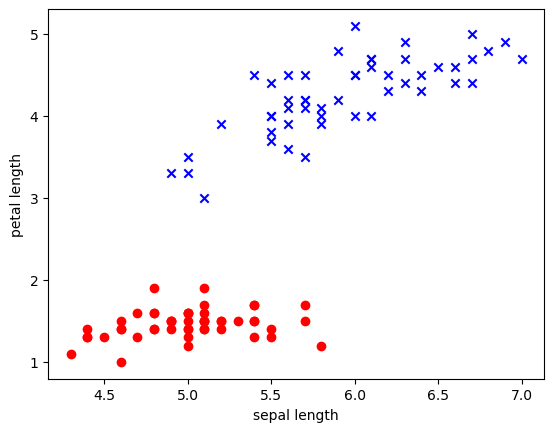

In [10]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')  
plt.show()

Text(0, 0.5, 'Number of misclassifications')

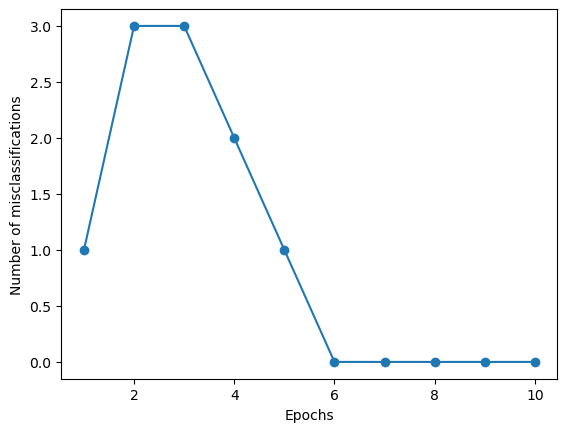

In [13]:
ppn=Percepton(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

In [15]:
class AdalineGD():
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1]) 
        # loc is mean and scale is std deviation.
        self.cost_=[]
        
        for _ in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self

    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        # we just used activation function as identity function.
        # we will use different activation in further.
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)

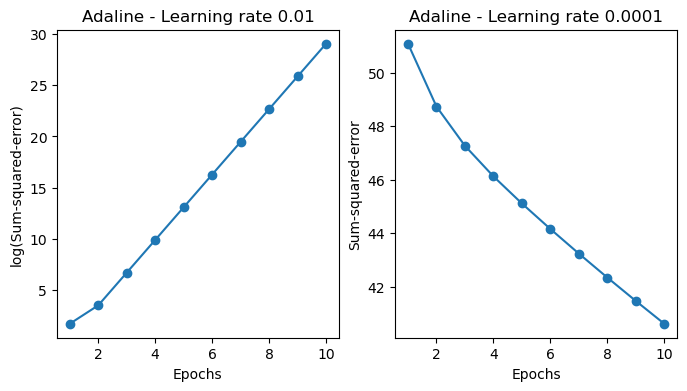

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))

ada1=AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs') 
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2=AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')      
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')   
plt.show()  

- Due to high learning rate the cost or error  was increasing that we can see in eta = 0.1  .
